**1. Download Dataset**

https://drive.google.com/file/d/1_HcM0K8wt4b7FMLkc1V1dv0y6I_9ULzy/view

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

**2. Load the dataset.**

In [2]:
churn=pd.read_csv("Churn_Modelling.csv")

**3. Perform Below Visualizations.**


● Univariate Analysis

● Bi - Variate Analysis

● Multi - Variate Analysis

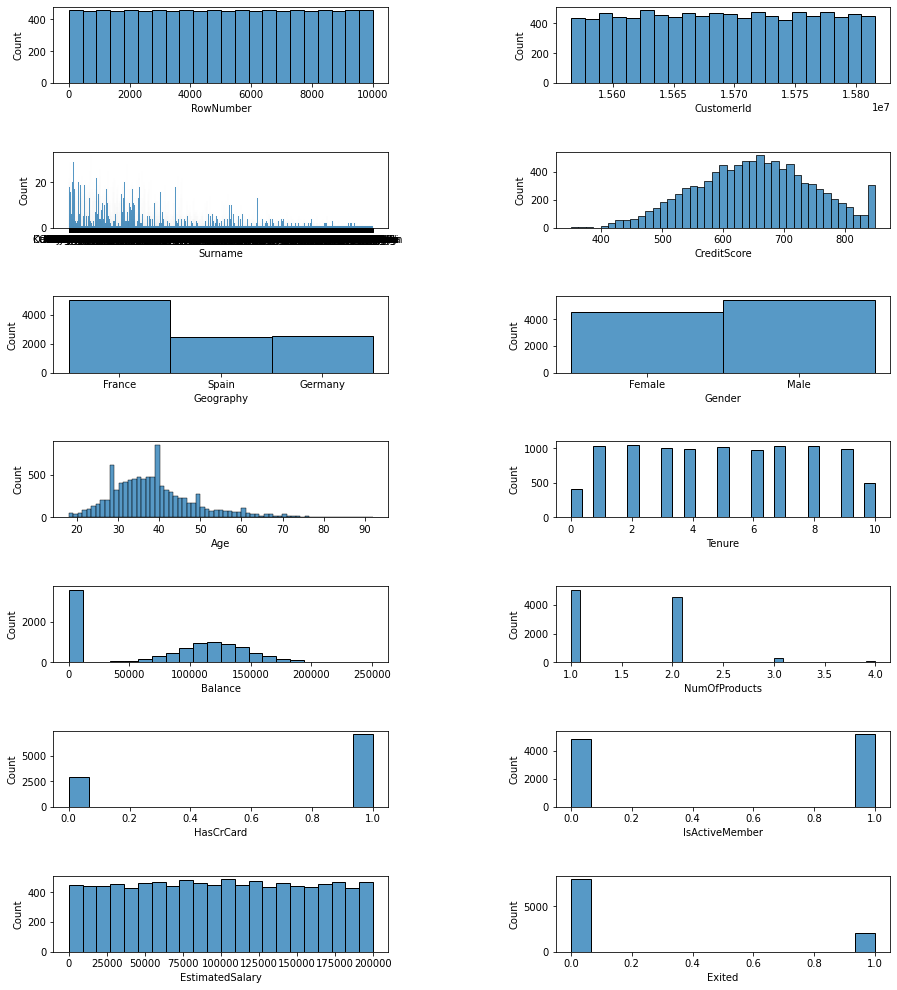

In [3]:
#univariate analysis
fig, ax = plt.subplots(7, 2, figsize=(15, 15))

plt.subplots_adjust(left=None, bottom=None, right=None, top=1, wspace=0.5, hspace=0.9)

for variable, subplot in zip(churn.columns, ax.flatten()):
    sns.histplot(churn[variable], ax=subplot)

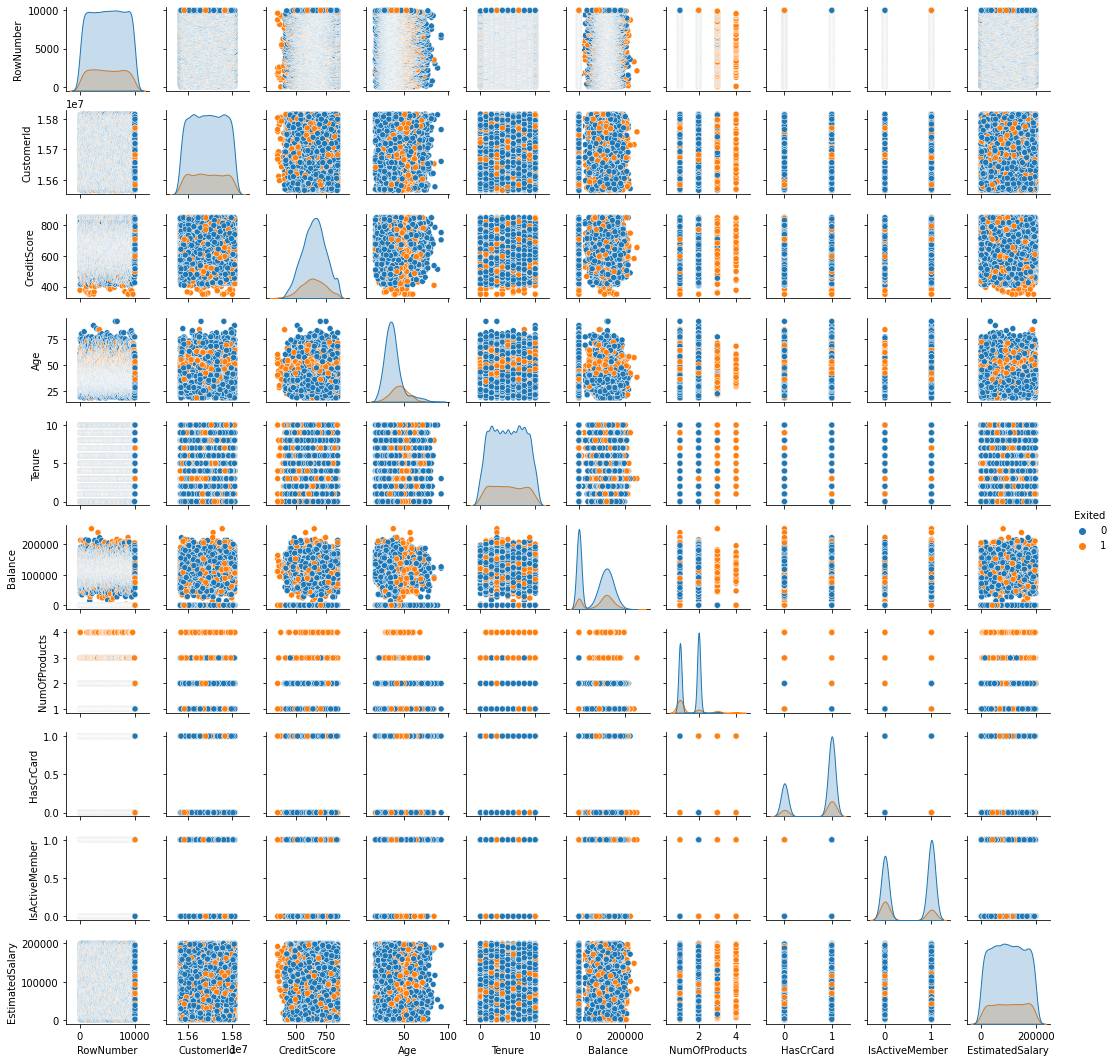

In [4]:
#bivariate analysis
sns.pairplot(data = churn, hue='Exited',height=1.5)
plt.show()

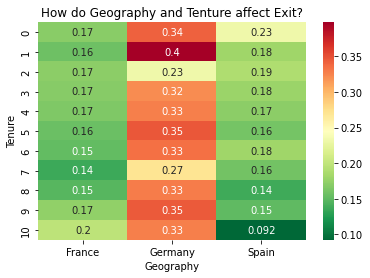

In [5]:
#multivariate analysis
result = pd.pivot_table(data=churn, index='Tenure', columns='Geography',values='Exited')
sns.heatmap(result, annot=True, cmap = 'RdYlGn_r').set_title('How do Geography and Tenture affect Exit?')
plt.show()

**4. Perform descriptive statistics on the dataset.**

In [6]:
churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**5. Handle the Missing values.**

In [7]:
print(churn.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


No null values found 

**6. Find the outliers and replace the outliers**

In [8]:
numeric_cols = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

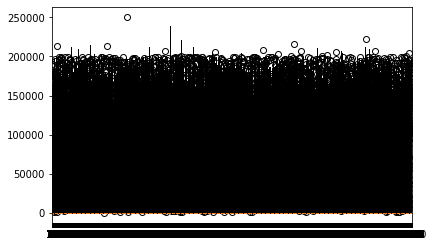

In [10]:
#box plot
fig = plt.figure(figsize =(5, 3)) 
a = fig.add_axes([0, 0, 1, 1])
bp = a.boxplot(churn[numeric_cols])

In [11]:
out=['CreditScore','Age','NumOfProducts']
for i in out:
    for x in [i]:
        q75,q25 = np.percentile(churn.loc[:,x],[75,25])
        intr_qr = q75-q25

        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)

        churn.loc[churn[x] < min,x] = churn[i].mode()
        churn.loc[churn[x] > max,x] = churn[i].mode()

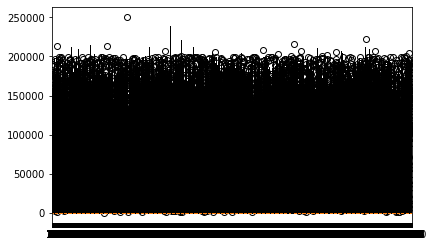

In [12]:
#box plot after replacing outliers
fig = plt.figure(figsize =(5, 3)) 
a = fig.add_axes([0, 0, 1, 1])
bp = a.boxplot(churn[numeric_cols])

**7. Check for Categorical columns and perform encoding.**

In [13]:
cat_churn=['Surname', 'Geography', 'Gender']
#Before encoding
churn.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42.0,2,0.00,1.0,1,1,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41.0,1,83807.86,1.0,0,1,112542.58,0
2,3,15619304,Onio,502.0,France,Female,42.0,8,159660.80,3.0,1,0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39.0,1,0.00,2.0,0,0,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43.0,2,125510.82,1.0,1,1,79084.10,0
5,6,15574012,Chu,645.0,Spain,Male,44.0,8,113755.78,2.0,1,0,149756.71,1
6,7,15592531,Bartlett,822.0,France,Male,50.0,7,0.00,2.0,1,1,10062.80,0
7,8,15656148,Obinna,NaN,Germany,Female,29.0,4,115046.74,NaN,1,0,119346.88,1
8,9,15792365,He,501.0,France,Male,44.0,4,142051.07,2.0,0,1,74940.50,0
9,10,15592389,H?,684.0,France,Male,27.0,2,134603.88,1.0,1,1,71725.73,0


In [14]:
encoder= LabelEncoder()

In [15]:
for i in cat_churn:
    encoder.fit(churn[i])
    churn[i]=encoder.transform(churn[i])
#after encoding
churn.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619.0,0,0,42.0,2,0.00,1.0,1,1,101348.88,1
1,2,15647311,1177,608.0,2,0,41.0,1,83807.86,1.0,0,1,112542.58,0
2,3,15619304,2040,502.0,0,0,42.0,8,159660.80,3.0,1,0,113931.57,1
3,4,15701354,289,699.0,0,0,39.0,1,0.00,2.0,0,0,93826.63,0
4,5,15737888,1822,850.0,2,0,43.0,2,125510.82,1.0,1,1,79084.10,0
5,6,15574012,537,645.0,2,1,44.0,8,113755.78,2.0,1,0,149756.71,1
6,7,15592531,177,822.0,0,1,50.0,7,0.00,2.0,1,1,10062.80,0
7,8,15656148,2000,NaN,1,0,29.0,4,115046.74,NaN,1,0,119346.88,1
8,9,15792365,1146,501.0,0,1,44.0,4,142051.07,2.0,0,1,74940.50,0
9,10,15592389,1081,684.0,0,1,27.0,2,134603.88,1.0,1,1,71725.73,0


**8. Split the data into dependent and independent variables.**

In [16]:
x_independent=churn.drop('Exited',axis=1)
x_independent=x_independent.drop('RowNumber',axis=1)
y_dependent=churn['Exited']

**9. Scale the independent variables**

In [17]:
scaler = StandardScaler()
scaler.fit(x_independent)

StandardScaler()

**10. Split the data into training and testing**

In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(x_independent,y_dependent,test_size=0.15,random_state=2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(8500, 12)
(1500, 12)
(8500,)
(1500,)
